<a href="https://colab.research.google.com/github/mzengin/randomtests/blob/main/kmeans2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Termination criterion satisfied


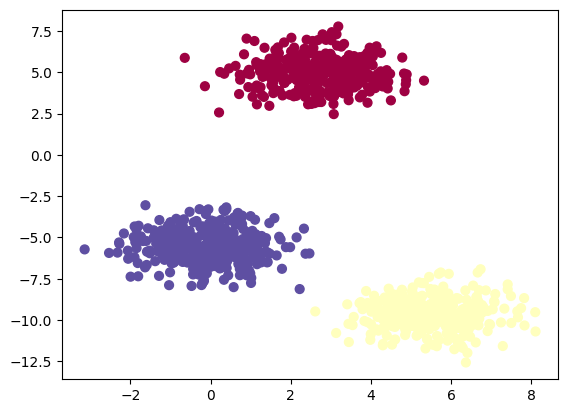

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters
        self.max_iterations = 100
        self.plot_figure = True
        self.num_examples = X.shape[0]
        self.num_features = X.shape[1]

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features))

        for k in range(self.K):
            centroid = X[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid

        return centroids

    def create_clusters(self, X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(self.K)]

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)

        return clusters

    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid

        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

        return y_pred

    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()

    def fit(self, X):
        centroids = self.initialize_random_centroids(X)

        for it in range(self.max_iterations):
            clusters = self.create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)

            diff = centroids - previous_centroids

            if not diff.any():
                print("Termination criterion satisfied")
                break

        # Get label predictions
        y_pred = self.predict_cluster(clusters, X)

        if self.plot_figure:
            self.plot_fig(X, y_pred)

        return y_pred


if __name__ == "__main__":
    np.random.seed(10)
    num_clusters = 3
    X, _ = make_blobs(n_samples=1000, n_features=2, centers=num_clusters)

    Kmeans = KMeansClustering(X, num_clusters)
    y_pred = Kmeans.fit(X)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [4]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [15]:
np.random.choice(10)

7

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


class KMeansClustering2:
  def __init__(self, X, num_clusters):
    self.K = num_clusters
    self.max_iterations = 200
    self.plot_figure = True
    self.num_examples = X.shape[0]
    self.num_features = X.shape[1]
    self.X = X

  def initialize_random_centroids(self):
    centroids = self.X[np.random.choice(range(self.num_examples), self.K, replace=False)]
    return centroids

  def create_clusters(self, X, centroids):
    # Will contain a list of the points that are associated with that specific cluster
    clusters = [[] for _ in range(self.K)]

    # Loop through each point and check which is the closest cluster
    for point_idx, point in enumerate(X):
      closest_centroid = np.argmin(
          np.sqrt(np.sum((point - centroids) ** 2, axis=1))
      )
      clusters[closest_centroid].append(point_idx)

    return clusters

  def create_clusters2(self, X, centroids):
    # Will contain a list of the points that are associated with that specific cluster
    clusters = [[] for _ in range(self.K)]

    # Loop through each point and check which is the closest cluster
    for point_idx, point in enumerate(X):
      #print(point)
      distances = np.linalg.norm(point - centroids, axis=1)
      #print(distances)
      closest_centroid = np.argmin(distances)
      #print(closest_centroid)
      clusters[closest_centroid].append(point_idx)
    return clusters

  def plot_fig(self, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()

  def predict_cluster(self, clusters, X):
    y_pred = np.zeros(self.num_examples)

    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            y_pred[sample_idx] = cluster_idx

    return y_pred

  def calculate_new_centroids(self, nums_assigned):
    new_centroids = np.zeros((self.K, self.num_features))

    for i, nums in enumerate(nums_assigned):
      new_centroids[i] = np.mean(self.X[nums])
    return new_centroids


  def fit(self, X):
    centroids = self.initialize_random_centroids()

    for k in range(self.max_iterations):
      clusters = self.create_clusters2(X, centroids)
      new_centroids = self.calculate_new_centroids(clusters)

      centroids = new_centroids

      if k == 198:
        y_pred = self.predict_cluster(clusters, X)

        self.plot_fig(X, y_pred)
        break






In [32]:
X = np.random.rand(100,2)

In [154]:
np.mean(X, axis=0)

array([0.49727076, 0.52823564])

In [33]:
km = KMeansClustering2(X, 3)

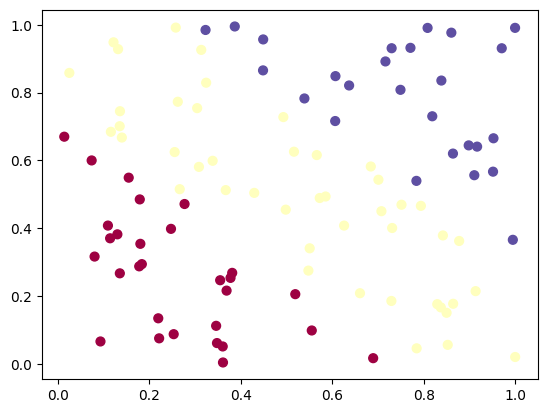

In [34]:
km.fit(X)

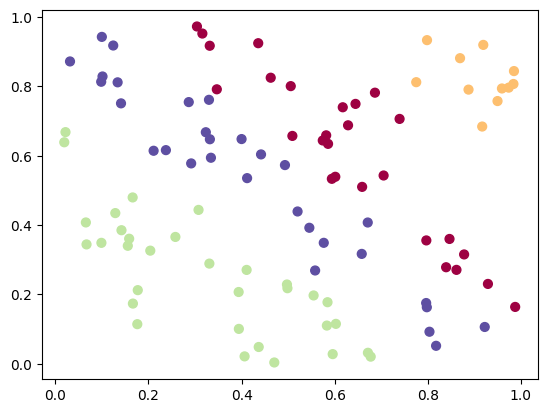

In [23]:
km.fit(X)

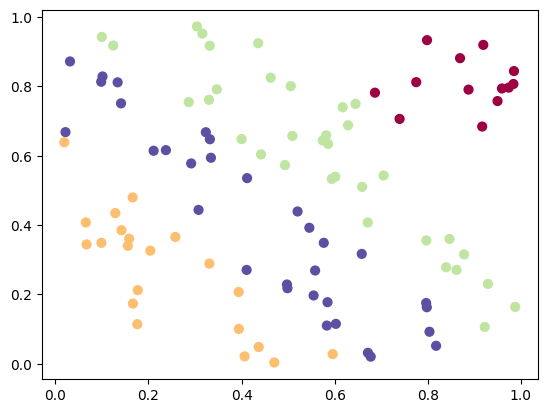

In [26]:
km.fit(X)

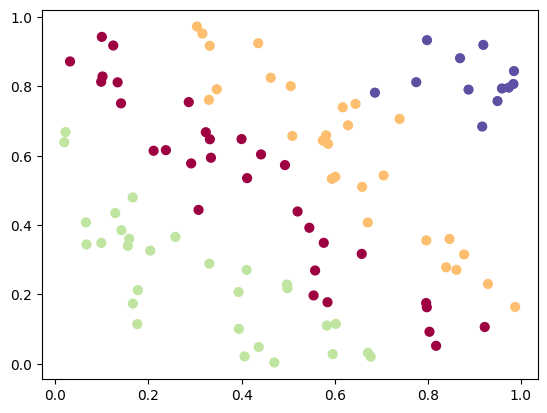

In [28]:
km.fit(X)

In [149]:
nums_assigned = km.create_clusters2(X, centroids)

[0.17557306 0.93885485]
[0.85529315 0.69847151 0.36357948 0.54277655]
2
[0.79108736 0.43200104]
[0.26721748 0.72307214 0.47463711 0.36668293]
0
[0.22877535 0.46214022]
[0.47333923 0.25606144 0.46221367 0.56902015]
1
[0.54635754 0.82178487]
[0.6116477  0.73365888 0.02671746 0.15424735]
2
[0.97855025 0.70144999]
[0.5954211  0.99653394 0.47431348 0.29456537]
3
[0.45284635 0.96548361]
[0.77056279 0.80525858 0.15885255 0.30243515]
2
[0.63824026 0.69968389]
[0.48336206 0.71009569 0.16991089 0.10433337]
3
[0.25287304 0.30184668]
[0.38991114 0.17001446 0.58400187 0.65683193]
1
[0.10754788 0.431422  ]
[0.56803764 0.18668929 0.56733821 0.6875528 ]
1
[0.41894702 0.43033473]
[0.30287878 0.3752006  0.40378056 0.45132936]
0
[0.46688653 0.72156422]
[0.53191723 0.60575431 0.11288063 0.23851529]
2
[0.76114058 0.22427067]
[0.12809133 0.66894808 0.6440759  0.56570273]
0
[0.88362462 0.39956222]
[0.3102143  0.805993   0.55712987 0.42961469]
0
[0.6839555  0.93495342]
[0.72038985 0.90849325 0.19975591 0.1492

In [150]:
nums_assigned

[[1,
  9,
  11,
  12,
  15,
  16,
  21,
  23,
  24,
  25,
  31,
  39,
  40,
  46,
  47,
  49,
  51,
  53,
  62,
  63,
  65,
  73,
  75,
  76,
  83,
  84,
  86,
  87,
  91,
  92,
  93,
  95],
 [2,
  7,
  8,
  17,
  20,
  26,
  27,
  28,
  29,
  32,
  38,
  43,
  45,
  54,
  58,
  59,
  60,
  74,
  88,
  94,
  97],
 [0,
  3,
  5,
  10,
  14,
  18,
  22,
  33,
  35,
  36,
  37,
  41,
  44,
  50,
  56,
  61,
  66,
  67,
  69,
  70,
  71,
  72,
  78,
  81,
  82,
  90,
  98],
 [4,
  6,
  13,
  19,
  30,
  34,
  42,
  48,
  52,
  55,
  57,
  64,
  68,
  77,
  79,
  80,
  85,
  89,
  96,
  99]]

In [127]:
X

array([[1, 2],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 4]])

In [92]:
nums_assigned

[[4, 10, 16, 18, 42, 65, 76, 96, 99],
 [1, 12, 26, 30, 31, 37, 44, 47, 54, 57, 60, 90],
 [0,
  2,
  3,
  7,
  8,
  9,
  11,
  20,
  24,
  27,
  33,
  35,
  36,
  43,
  46,
  51,
  52,
  55,
  56,
  61,
  62,
  66,
  69,
  70,
  71,
  74,
  77,
  79,
  82,
  85,
  86,
  88,
  89],
 [5,
  28,
  29,
  32,
  38,
  39,
  41,
  49,
  53,
  59,
  64,
  67,
  73,
  78,
  80,
  83,
  84,
  91,
  92,
  95,
  97],
 [6,
  13,
  14,
  15,
  17,
  19,
  21,
  22,
  23,
  25,
  34,
  40,
  45,
  48,
  50,
  58,
  63,
  68,
  72,
  75,
  81,
  87,
  93,
  94,
  98]]

In [63]:
np.random.choice([1,2,3,4], 3)

array([2, 1, 3])

In [67]:
X[np.random.choice([1,2,3,4], 3, replace=False)]

array([[0.70144999, 0.45284635],
       [0.82178487, 0.97855025],
       [0.46214022, 0.54635754]])

In [66]:
np.random.choice([1,2,3,4], 3, replace=False)

array([4, 2, 1])

In [28]:
np.argmin(np.linalg.norm(X[0]-X[:5,], axis=1))

0

In [18]:
X

array([[0.93885485, 0.79108736],
       [0.43200104, 0.22877535],
       [0.46214022, 0.54635754],
       [0.82178487, 0.97855025],
       [0.70144999, 0.45284635],
       [0.96548361, 0.63824026],
       [0.69968389, 0.25287304],
       [0.30184668, 0.10754788],
       [0.431422  , 0.41894702],
       [0.43033473, 0.46688653],
       [0.72156422, 0.76114058],
       [0.22427067, 0.88362462],
       [0.39956222, 0.6839555 ],
       [0.93495342, 0.21066204],
       [0.62737605, 0.91540382],
       [0.43055226, 0.50351052],
       [0.27241906, 0.22818524],
       [0.09055802, 0.15368748],
       [0.65167269, 0.64364333],
       [0.87823545, 0.1100681 ],
       [0.10620981, 0.51210057],
       [0.00383861, 0.58247071],
       [0.68336001, 0.79634497],
       [0.31162234, 0.92125758],
       [0.42305501, 0.68718681],
       [0.17695313, 0.19126028],
       [0.49187412, 0.059056  ],
       [0.10825272, 0.16379016],
       [0.1768904 , 0.11067374],
       [0.27627014, 0.64236738],
       [0.

In [42]:
np.mean([[1,2],[3,4]], axis=0)

array([2., 3.])

In [114]:
a1

array([[1, 2],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 4]])

In [115]:
X = np.array([[1,2],[1,0],[2,0],[3,0],[4,4]])

In [118]:
np.argmin(np.linalg.norm(a1-np.array([0,0]), axis=1))

1